In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
from sklearn.cluster import KMeans

data = pandas.read_csv('data.tsv', sep="\t", header=None, names=['date', 'id', 'type', 'hash', 'latitude', 'longitude'])
route_to_stops_count = pandas.read_csv('route_to_stops_count.tsv', sep="\t", header=None, names=['hash', 'num'])
debug = pandas.read_csv('debug.tsv', sep="\t", header=None, names=['type', 'hash', 'latitude', 'longitude'])

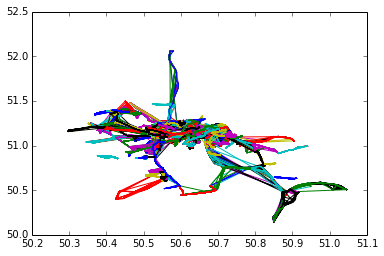

In [4]:
len_num = len(data["id"].unique())
for id in data["id"].unique():
    t = data[data["id"] == id]
    plt.plot(t['latitude'], t['longitude'])       

    

In [11]:
x = route_to_stops_count[route_to_stops_count["hash"] == 86]
k_means = KMeans(n_clusters = x["num"][0])
data_bus = data[data["hash"] == 86]
coor = data_bus[['latitude', 'longitude']]
k_means.fit(coor)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=47, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

/usr/lib/python3/dist-packages/pandas/core/frame.py:1686: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


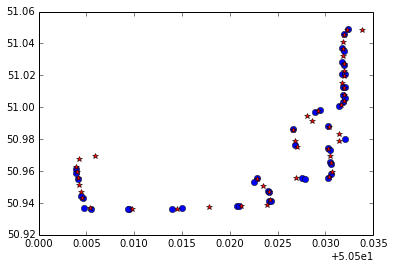

In [12]:
t = debug[debug["hash"] == 86]
z = t[debug["type"] == "bus"]
plt.plot(z['latitude'], z['longitude'], 'o') 
a = []
for i in range(x["num"][0]):
    a.append(k_means.cluster_centers_[i])

plt.plot(*zip(*a), marker='*', color='r', ls='')

In [68]:
routes = []
num = route_to_stops_count["num"].unique()
hash = data["hash"].unique()

for i in range(len(hash)):
    kmeans = KMeans(n_clusters = route_to_stops_count[route_to_stops_count["hash"] == [i]]["num"])
    data_bus = data[data["hash"]==i]   
    coor = data_bus[['latitude', 'longitude']]
    x = 4
    x = route_to_stops_count[route_to_stops_count["hash"] == [i]]["num"]
    print (len(coor))
    print (x)
    print (kmeans)
    if (len(coor) != 0 ):
        kmeans.fit(coor)
        X = [x for (x, y) in a]
        Y = [y for (x, y) in a]
        array = [(X, Y)]
        routes.append(array)  


0
Series([], name: num, dtype: int64)
KMeans(copy_x=True, init='k-means++', max_iter=300,
    n_clusters=Series([], name: num, dtype: int64), n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
12329
tramway    49
Name: num, dtype: int64
KMeans(copy_x=True, init='k-means++', max_iter=300,
    n_clusters=tramway    49
Name: num, dtype: int64, n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().